In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *

In [3]:
import torch
print(torch.__version__)

1.8.1


In [4]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [5]:
!pip install detectron2 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html


In [7]:
!pip install opencv-python

In [8]:
# Base setup:
# detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
%matplotlib inline

# detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [16]:
!wget http://images.cocodataset.org/val2017/000000282037.jpg -q -O input.jpg
im = cv2.imread("./people_badminton.jpg")

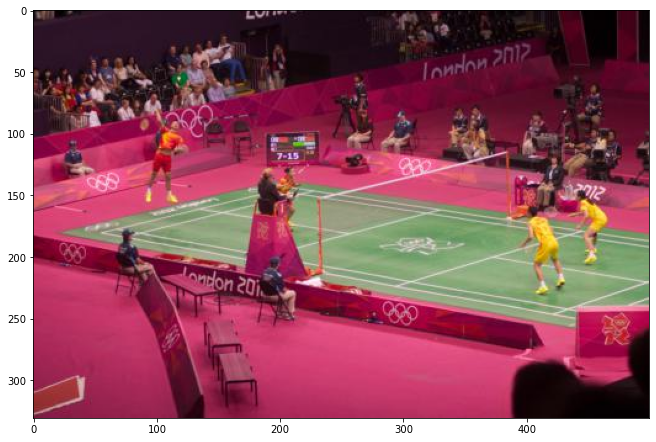

In [17]:
plt.figure(figsize=(15,7.5))
plt.imshow(im[..., ::-1])

In [19]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

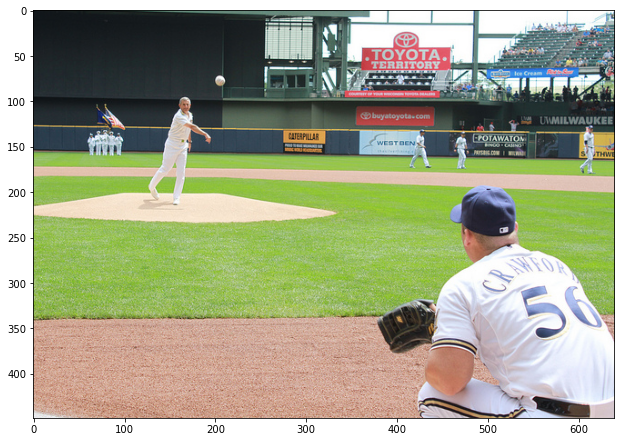

In [18]:
im = cv2.imread("./input.jpg")
plt.figure(figsize=(15,7.5))
plt.imshow(im[..., ::-1])

In [11]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im[..., ::-1])

In [12]:
print(outputs["instances"].pred_classes)


tensor([ 0,  0,  0,  0,  0, 35, 32,  0,  0,  0,  0,  0], device='cuda:0')


In [13]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0])


namespace(name='coco_2017_train',
          json_file='datasets/coco/annotations/instances_train2017.json',
          image_root='datasets/coco/train2017',
          evaluator_type='coco',
          thing_dataset_id_to_contiguous_id={1: 0,
                                             2: 1,
                                             3: 2,
                                             4: 3,
                                             5: 4,
                                             6: 5,
                                             7: 6,
                                             8: 7,
                                             9: 8,
                                             10: 9,
                                             11: 10,
                                             13: 11,
                                             14: 12,
                                             15: 13,
                                             16: 14,
                                   

In [14]:
import pandas as pd
modelclasses = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
df = pd.DataFrame(modelclasses,columns=['Model classes'])
df

,Model classes
0,person
1,bicycle
2,car
3,motorcycle
4,airplane
...,...
75,vase
76,scissors
77,teddy bear
78,hair drier


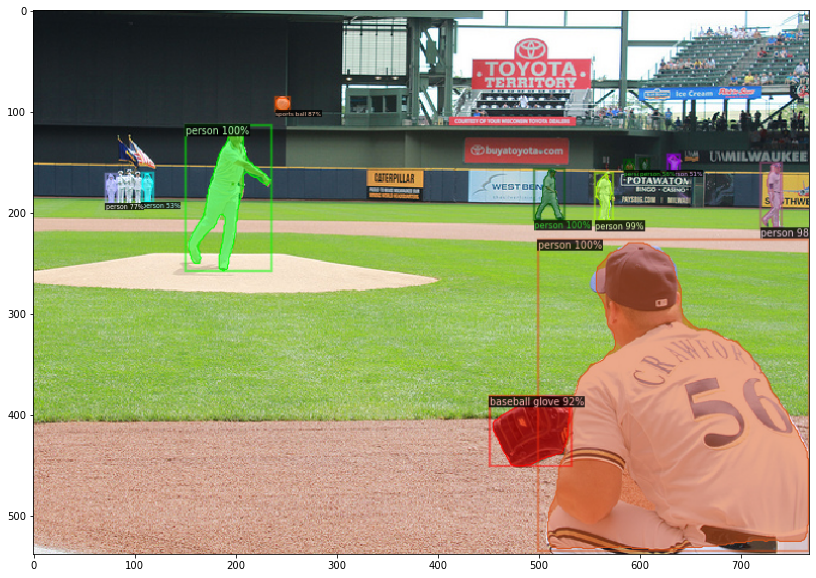

In [28]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(out.get_image()[..., ::-1][..., ::-1])

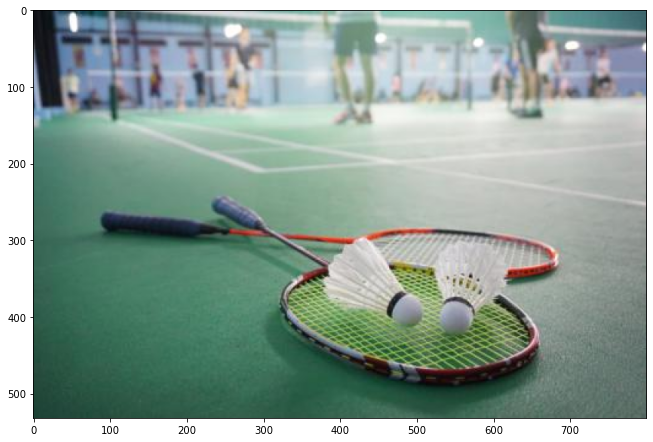

In [33]:
image = cv2.imread("./bat_shuttle_badminton.jpg")
image = image_resize(image,width = 800, height = 600)
plt.figure(figsize=(15,7.5))
plt.imshow(image[..., ::-1])

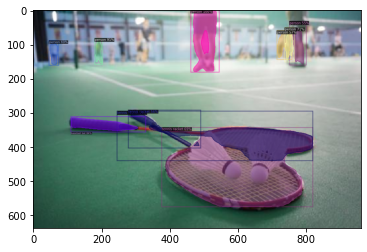

In [34]:
rgb_image = image[:, :, ::-1]
outputs = predictor(rgb_image)
# get metadata
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
# visualise
v = Visualizer(rgb_image[:, :, ::-1], metadata=metadata, scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# get image 
img = Image.fromarray(np.uint8(v.get_image()[:, :, ::-1]))

plt.imshow(img)